Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation. 

In [347]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#Please comment out this line of code if unnecessary
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (7).csv


In [348]:
Data  = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
Data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [349]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [350]:
Data.shape

(5000, 14)

In [351]:
Data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

EDA:  Study  the  data  distribution  in  each  attribute  and  target  variable,  share  your  findings (20 marks)
*   Number of unique in each column?
*   Number of people with zero mortgage?
*   Number of people with zero credit card spending per month?
*  Value counts of all categorical columns.
*   Univariate and Bivariate.
*   Get data model ready.

Number of unique in each column.

In [352]:
Data.ID.nunique()

5000

In [353]:
Data.Age.nunique()

45

In [354]:
Data.Experience.nunique()

47

In [355]:
Data.Income.nunique()

162

In [356]:
Data['ZIP Code'].nunique()

467

In [357]:
Data.Family.nunique()

4

In [358]:
Data.CCAvg.nunique()

108

In [359]:
Data.Education.nunique()

3

In [360]:
Data.Mortgage.nunique()

347

In [361]:
Data['Personal Loan'].nunique()

2

In [362]:
Data['Securities Account'].nunique()

2

In [363]:
Data['CD Account'].nunique()

2

In [364]:
Data['Online'].nunique()

2

In [365]:
Data.CreditCard.nunique()

2

Number of people who owe zero for mortgage and spend average of $0 on credit card per month.

In [366]:
Data.query('Mortgage == "0"').Mortgage.count()

3462

In [367]:
Data.query('CCAvg == "0"').CCAvg.count()

106

Value counts of categorical variables.

In [368]:
Data.ID.value_counts()

2047    1
2608    1
4647    1
2600    1
553     1
       ..
3263    1
1218    1
3267    1
1222    1
2049    1
Name: ID, Length: 5000, dtype: int64

In [369]:
Data['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

In [370]:
Data.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [371]:
Data.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [372]:
Data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [373]:
Data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [374]:
Data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [375]:
Data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [376]:
Data.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

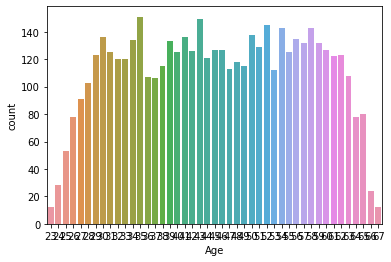

In [377]:
sns.countplot(Data.Age)

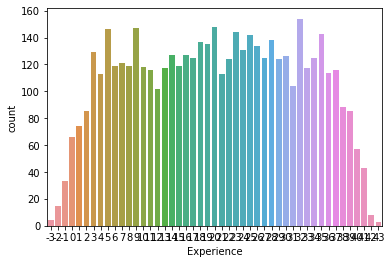

In [378]:
sns.countplot(Data.Experience)

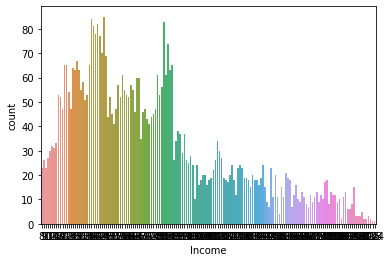

In [379]:
sns.countplot(Data.Income)

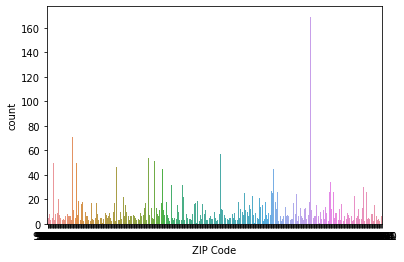

In [380]:
sns.countplot(Data['ZIP Code'])

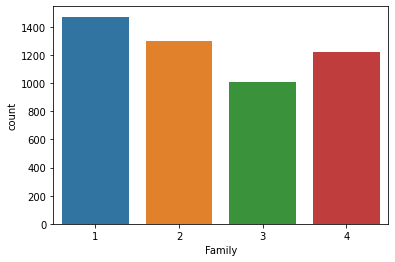

In [381]:
sns.countplot(Data.Family)

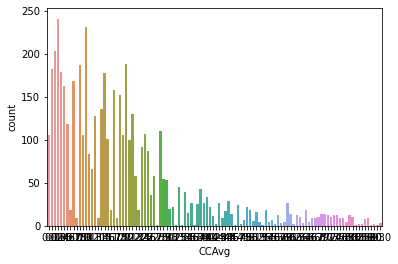

In [382]:
sns.countplot(Data.CCAvg)

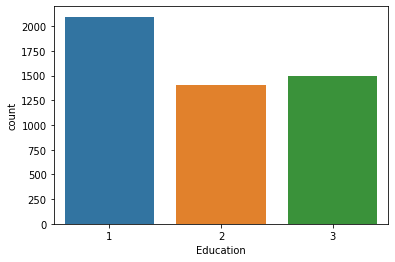

In [383]:
sns.countplot(Data.Education)

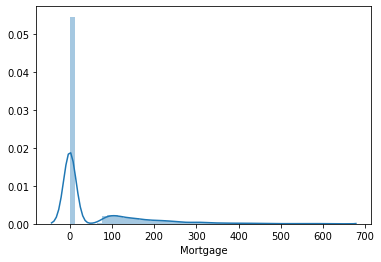

In [384]:
sns.distplot(Data.Mortgage)

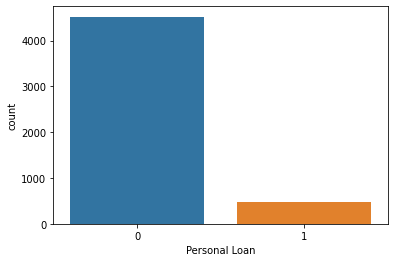

In [385]:
sns.countplot(Data['Personal Loan'])

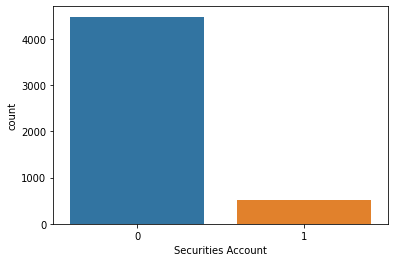

In [386]:
sns.countplot(Data['Securities Account'])

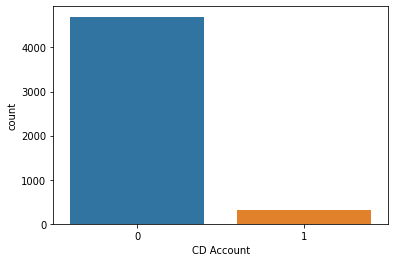

In [387]:
sns.countplot(Data['CD Account'])

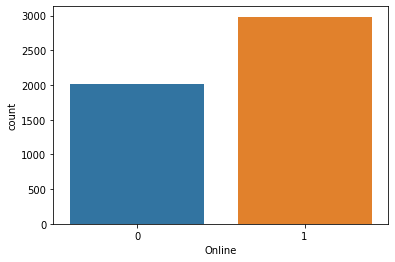

In [388]:
sns.countplot(Data.Online)

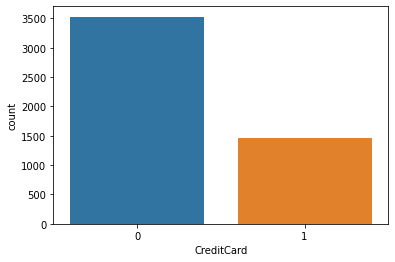

In [389]:
sns.countplot(Data.CreditCard)

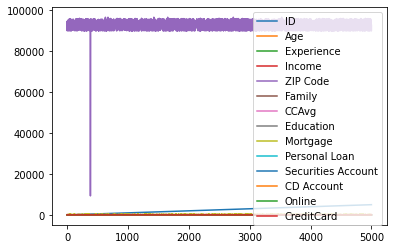

In [390]:
Data.plot.line()

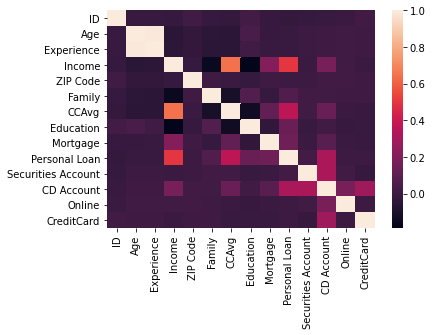

In [391]:
sns.heatmap(Data.corr(), xticklabels = Data.columns.values, yticklabels = Data.columns.values)

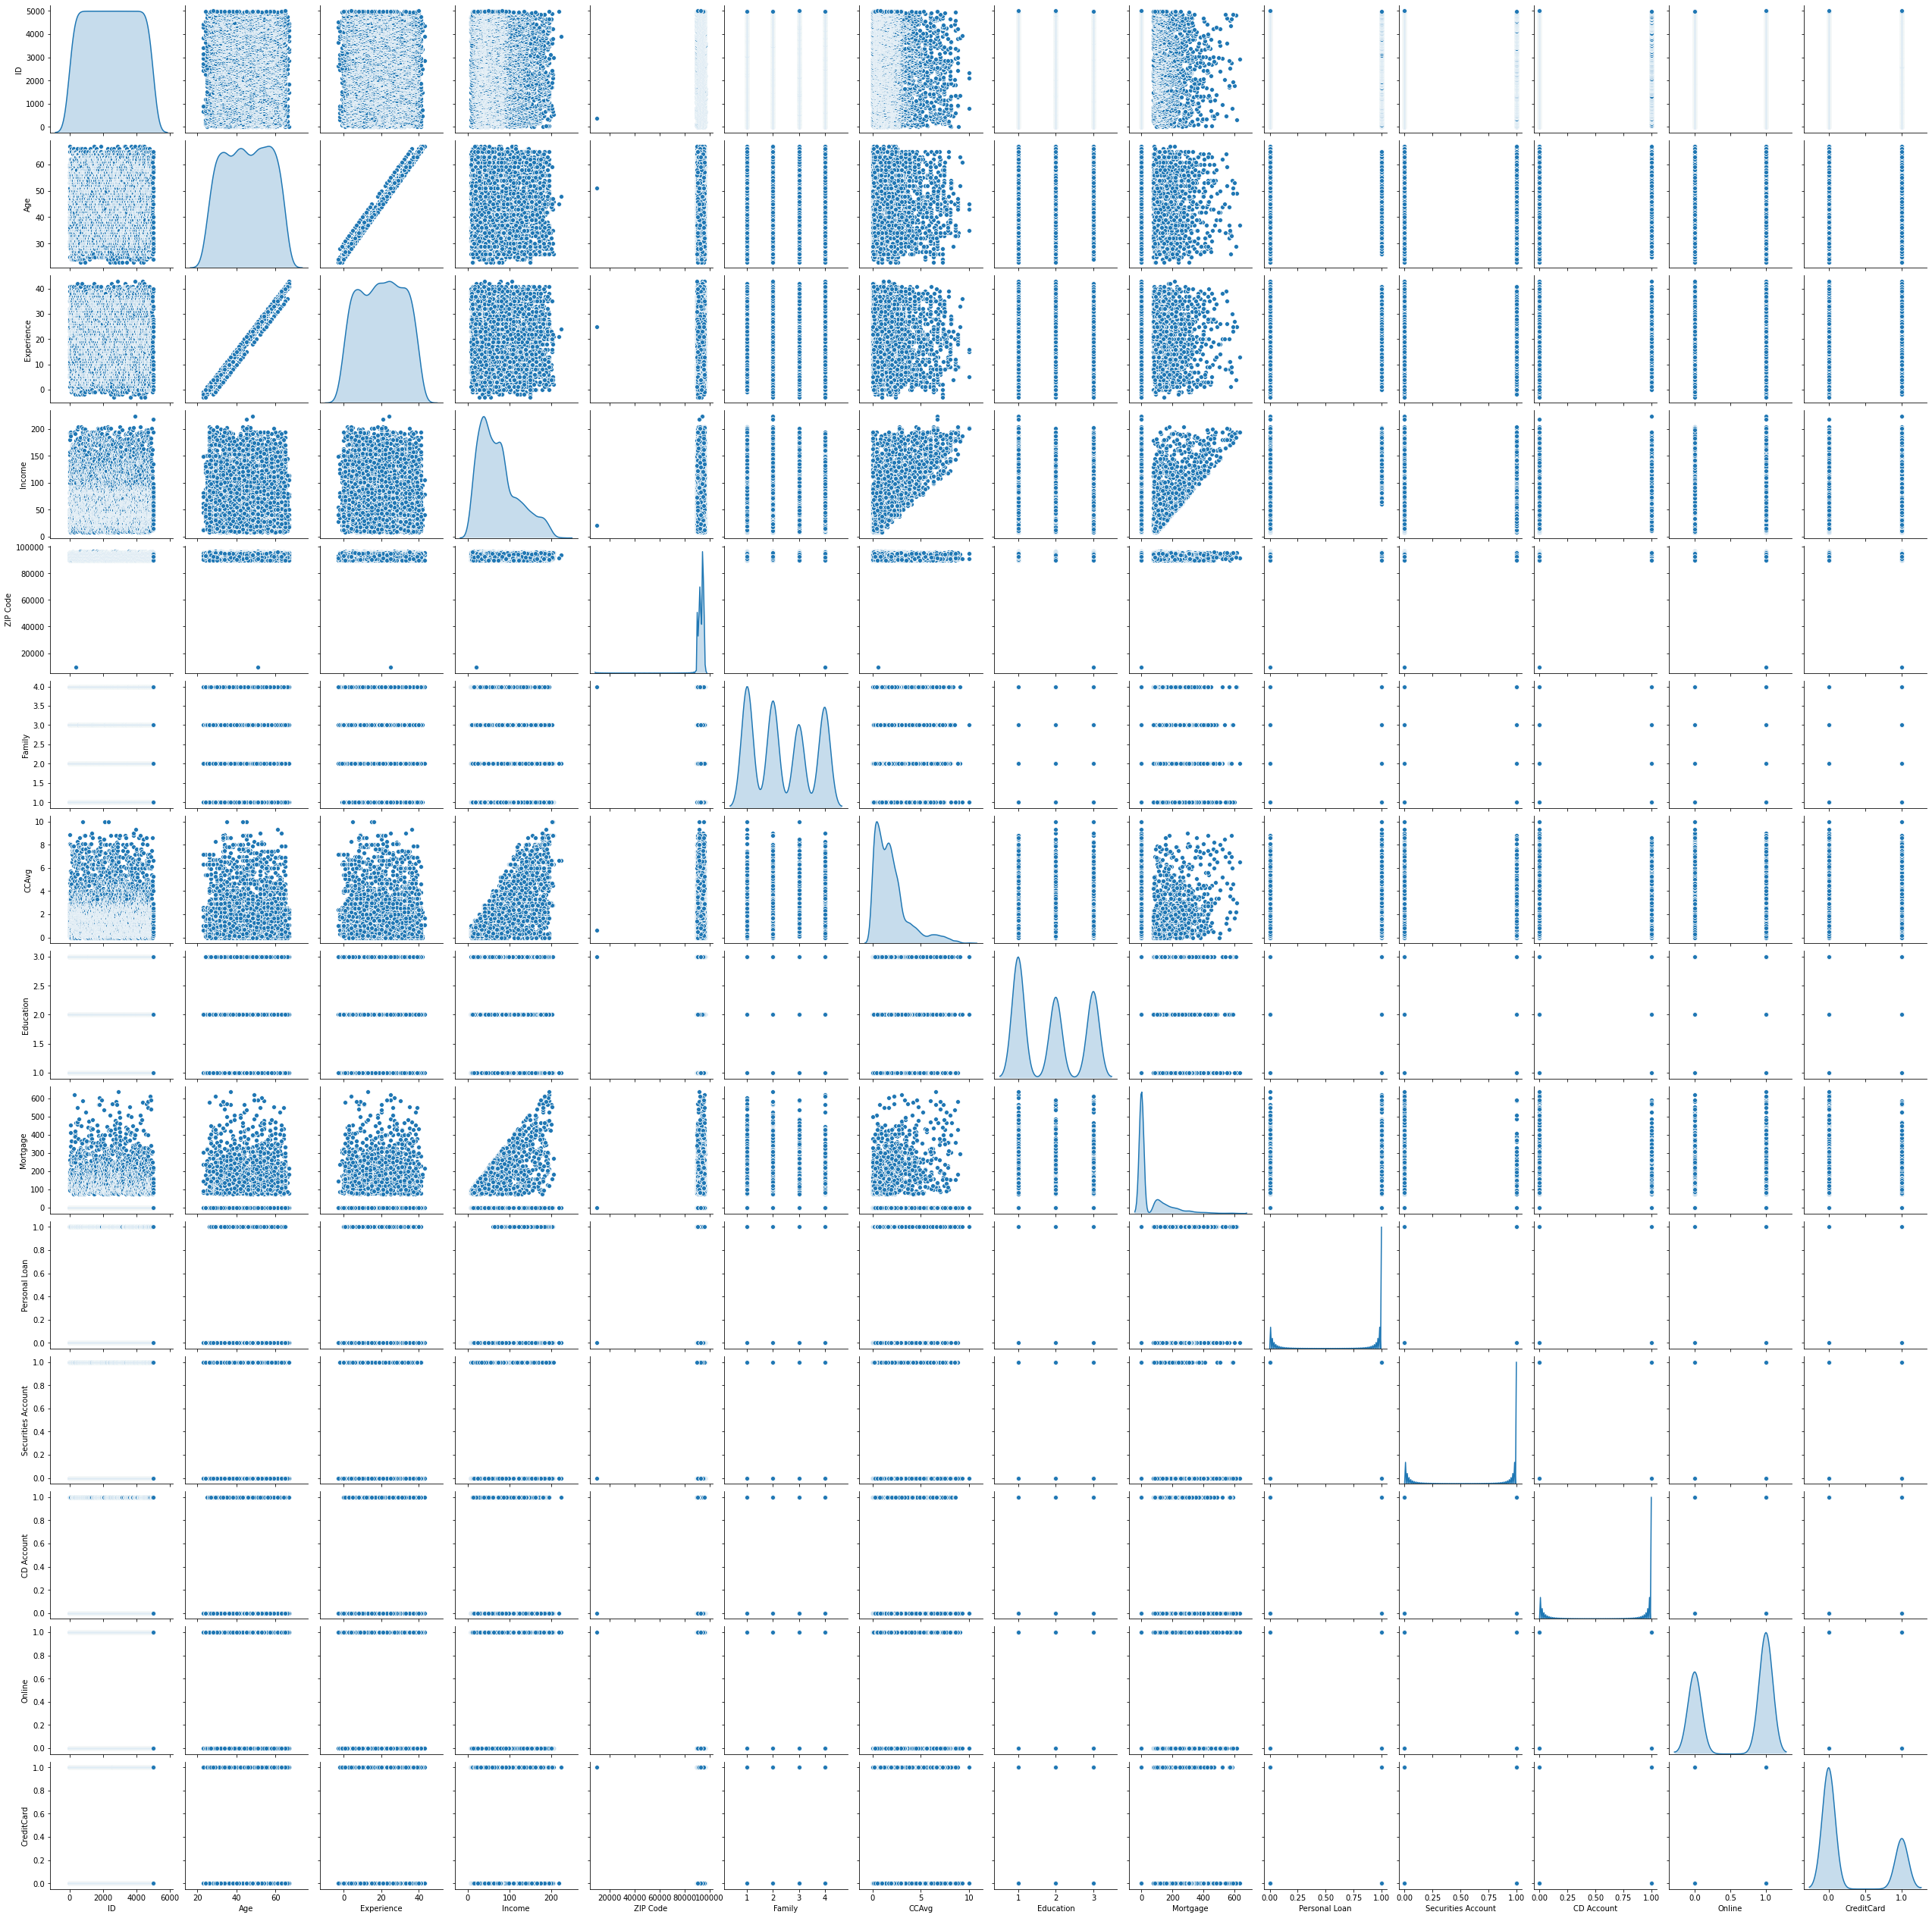

In [392]:
sns.pairplot(Data, diag_kind='kde');

Split the data into training and test set in the ratio of 70:30 respectively.

In [0]:
y = Data['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(Data, y, test_size=0.3)

Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance.

In [397]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [398]:
print("training set score: %f" % logreg.score(X_train, y_train))
print('\n'"test set score: %f" % logreg.score(X_test, y_test))

training set score: 0.909143

test set score: 0.904667


Give your reasoning on how can the model perform better? (10 marks)Hint: Check parameter.

The higher the value of C parameter, the less the model is regularized. For this model, less regularization improves the test score.

In [403]:
logreg100=LogisticRegression(C=100)
logreg100.fit(X_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [407]:
print('\n'"training set score of logistic regression: %f" % logreg100.score(X_train, y_train))
print('\n'"test set score of logistic regression: %f" % logreg100.score(X_test, y_test))


training set score of logistic regression: 0.909143

test set score of logistic regression: 0.904667


In [404]:
logreg001=LogisticRegression(C=.001)
logreg001.fit(X_train,y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [408]:
print('\n'"training set score of logistic regression .001: %f" % logreg001.score(X_train, y_train))
print('\n'"test set score of logistic regression .001: %f" % logreg001.score(X_test, y_test))


training set score of logistic regression .001: 0.909143

test set score of logistic regression .001: 0.904000


Give Business understanding of your model? (5 marks)